# Motor vehicle insurance analysis

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('../data/motor-vehicle-insurance-data-2018.csv', sep=';', dtype={6: object})

pd.set_option('display.max_rows', 1000)

## Data overview

### Column names

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

### Column Descriptions

1. ID: A unique identifier for each entry in the dataset.
2. Date_start_contract: The date when the insurance contract started.
3. Date_last_renewal: The last date the insurance contract was renewed.
4. Date_next_renewal: The next scheduled date for the insurance contract renewal.
5. Date_birth: The birthdate of the policyholder.
6. Date_driving_licence: The date when the policyholder obtained their driving license.
7. Distribution_channel: The method through which the insurance policy was sold (e.g., online, agent).
8. Seniority: The number of years the policyholder has been with the insurance company.
9. Policies_in_force: The number of active policies the policyholder has.
10. Max_policies: The maximum number of policies the policyholder has had at any point.
11. Max_products: The maximum number of different insurance products the policyholder has purchased.
12. Lapse: Indicates if a policy has lapsed (i.e., the policy is no longer active due to non-payment or cancellation
13. Date_lapse: The date when the policy lapsed.
14. Payment: Indicates the payment method or status (e.g., paid, unpaid).
15. Premium: The amount paid for the insurance policy.
16. Cost_claims_year: The total cost of claims made in a year.
17. N_claims_year: The number of claims made in a year.
18. N_claims_history: The total number of claims made by the policyholder.
19. R_Claims_history: A ratio or metric related to the claims history, possibly indicating risk or frequency.
20. Type_risk: A categorization of the risk level associated with the policyholder or the policy.
21. Area: A code or identifier for the geographical area of the policyholder.
22. Second_driver: Indicates if there is a second driver listed on the policy.
23. Year_matriculation: The year the vehicle covered by the insurance was first registered.
24. Power: The power of the vehicle in horsepower or another unit.
25. Cylinder_capacity: The engine capacity of the vehicle, likely in cubic centimeters (cc).
26. Value_vehicle: The insured value of the vehicle.
27. N_doors: The number of doors on the vehicle.
28. Type_fuel: The type of fuel the vehicle uses (e.g., petrol, diesel).
29. Length: A measurement of the vehicle's length, possibly in meters.
30. Weight: The weight of the vehicle, likely in kilograms.

## Data Cleaning

In [7]:
columns_to_keep = [
    'ID', 'Date_birth',
    'Date_driving_licence', 'Premium', 'Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors',
    'Type_fuel', 'Length', 'Weight'
]

data = data[columns_to_keep]

In [8]:
data.isnull().sum()

ID                          0
Date_birth                  0
Date_driving_licence        0
Premium                     0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                  10329
Weight                      0
dtype: int64

#### Remove motorcycles from the dataset

In [9]:
# Motorcyle critetia

motorcycle_criteria = {
    'Power': 70,
    'Cylinder_capacity': 900,
    'Length': 3.5,
    'Weight': 1000
}

# Identify vehicles that meet the motorcycle criteria
def is_motorcycle(entry):
    return (
        entry['Power'] <= motorcycle_criteria['Power'] or
        entry['Cylinder_capacity'] <= motorcycle_criteria['Cylinder_capacity'] or
        entry['Length'] <= motorcycle_criteria['Length'] or
        entry['Weight'] <= motorcycle_criteria['Weight']
    )

In [10]:
# Drop rows where number of doors is zero
data = data[data['N_doors'] > 0]

In [11]:
# Identify motorcycles

motorcycles = data[data.apply(is_motorcycle, axis=1)]
motorcycles

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
22,9,22/10/1949,17/05/1995,259.12,65,1870,13140.00,5,D,4.129,1125
23,9,22/10/1949,17/05/1995,214.34,65,1870,13140.00,5,D,4.129,1125
24,10,22/10/1949,17/05/1995,294.93,65,1560,24850.00,5,D,4.590,1530
25,10,22/10/1949,17/05/1995,290.50,65,1560,24850.00,5,D,4.590,1530
26,11,22/10/1949,17/05/1995,253.41,65,1686,21600.00,5,D,4.467,1525
...,...,...,...,...,...,...,...,...,...,...,...
105528,53476,21/09/1952,29/06/1972,312.75,72,998,14720.00,5,P,3.466,883
105535,53483,27/02/1975,15/09/1993,302.67,70,1398,14850.00,3,D,4.030,1176
105544,53492,31/07/1971,13/06/1994,278.15,51,796,8295.00,5,P,3.495,775
105548,53496,26/07/1984,28/04/2017,253.94,11,505,10217.21,3,P,NaN,400


In [12]:
# Remove motorcycles from the dataset
data = data.drop(motorcycles.index)
data

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
6,3,18/03/1975,10/07/1995,380.20,85,1229,16030.00,5,P,3.999,1105
7,3,18/03/1975,10/07/1995,393.50,85,1229,16030.00,5,P,3.999,1105
8,3,18/03/1975,10/07/1995,393.50,85,1229,16030.00,5,P,3.999,1105
9,3,18/03/1975,10/07/1995,395.47,85,1229,16030.00,5,P,3.999,1105
15,6,21/10/1966,10/09/1990,250.52,87,1598,9927.00,4,P,4.250,1055
...,...,...,...,...,...,...,...,...,...,...,...
105549,53497,29/06/1961,28/12/1990,233.22,75,1968,21761.85,5,D,4.408,1564
105550,53498,25/07/1981,14/02/2007,263.79,110,1997,24320.00,5,D,4.740,1480
105551,53499,08/12/1976,29/11/2017,418.97,129,1998,30861.97,5,P,4.650,1440
105553,53501,15/09/1946,02/02/1982,339.66,90,1753,16610.00,5,D,4.555,1399


In [13]:
# Show data with missing length values
data[data['Length'].isnull()]

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
731,374,27/12/1942,29/04/1970,83.27,129,4525,42920.00,3,D,NaN,4525
732,374,27/12/1942,29/04/1970,83.68,129,4525,42920.00,3,D,NaN,4525
733,374,27/12/1942,29/04/1970,80.02,129,4525,42920.00,3,D,NaN,4525
1167,582,19/07/1960,31/10/1978,306.27,100,2874,19893.50,3,D,NaN,1785
1168,582,19/07/1960,31/10/1978,312.39,100,2874,19893.50,3,D,NaN,1785
1322,663,05/07/1963,15/09/1981,183.70,99,2477,19984.00,3,D,NaN,1690
2382,1210,20/09/1960,20/10/1995,245.31,105,1870,18090.00,5,D,NaN,1290
2383,1210,20/09/1960,20/10/1995,277.45,105,1870,18090.00,5,D,NaN,1290
2564,1313,10/04/1968,01/05/1988,361.86,105,2477,26486.60,5,D,NaN,1910
3137,1603,07/12/1989,11/01/2008,384.90,99,2477,23222.63,3,D,NaN,1755


In [14]:
# Calculate the mean length of vehicles to 3 decimal places
mean = round(data['Length'].mean(), 3)

data['Length'] = data['Length'].fillna(mean)


Set the datetime datatype for all dates

In [15]:
# Convert date fields to datetime
date_columns = ['Date_birth', 'Date_driving_licence']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce', dayfirst=True, format='%d/%m/%Y') # 'coerce' turns invalid parsing into NaT

data

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
6,3,1975-03-18,1995-07-10,380.20,85,1229,16030.00,5,P,3.999,1105
7,3,1975-03-18,1995-07-10,393.50,85,1229,16030.00,5,P,3.999,1105
8,3,1975-03-18,1995-07-10,393.50,85,1229,16030.00,5,P,3.999,1105
9,3,1975-03-18,1995-07-10,395.47,85,1229,16030.00,5,P,3.999,1105
15,6,1966-10-21,1990-09-10,250.52,87,1598,9927.00,4,P,4.250,1055
...,...,...,...,...,...,...,...,...,...,...,...
105549,53497,1961-06-29,1990-12-28,233.22,75,1968,21761.85,5,D,4.408,1564
105550,53498,1981-07-25,2007-02-14,263.79,110,1997,24320.00,5,D,4.740,1480
105551,53499,1976-12-08,2017-11-29,418.97,129,1998,30861.97,5,P,4.650,1440
105553,53501,1946-09-15,1982-02-02,339.66,90,1753,16610.00,5,D,4.555,1399


## Outlier Analysis

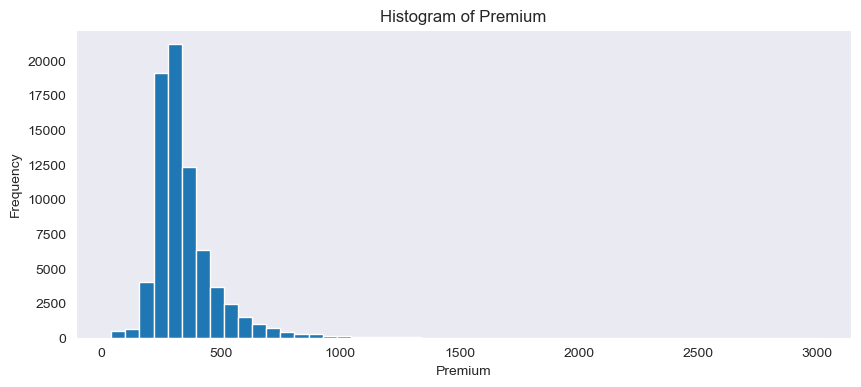

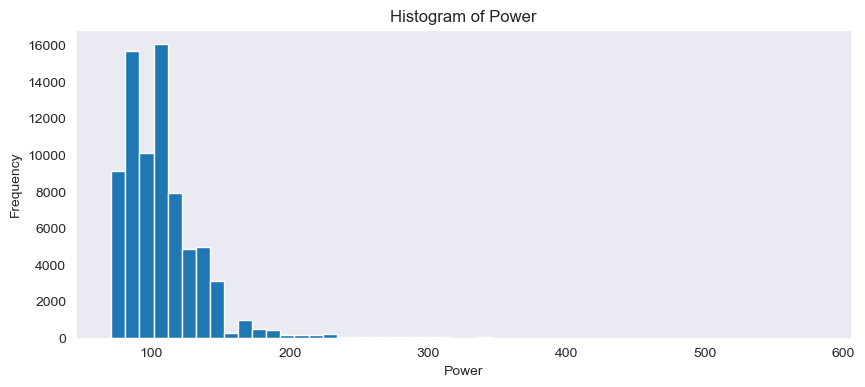

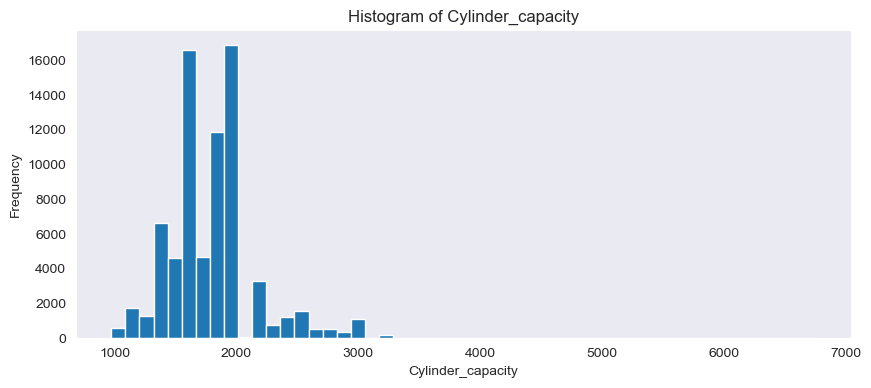

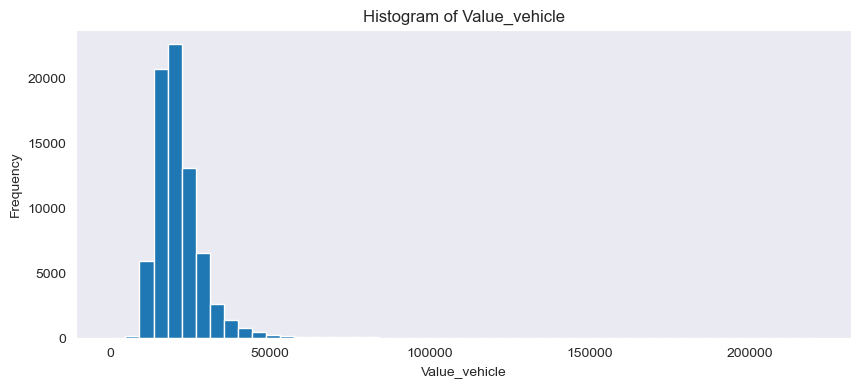

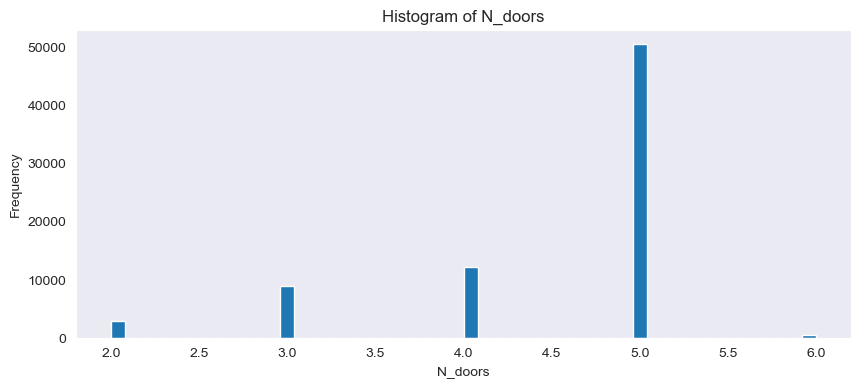

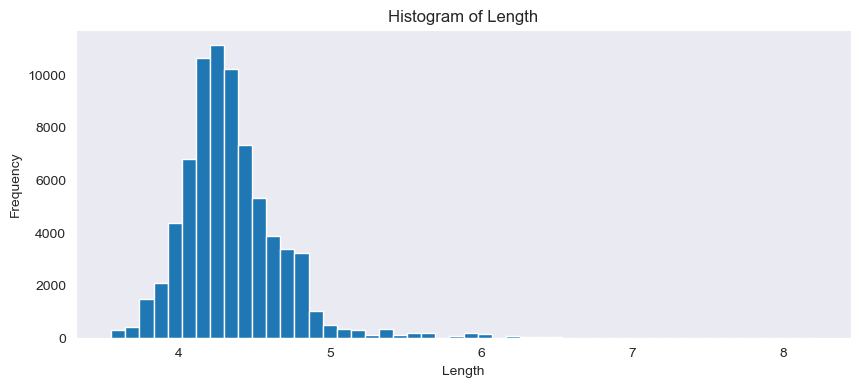

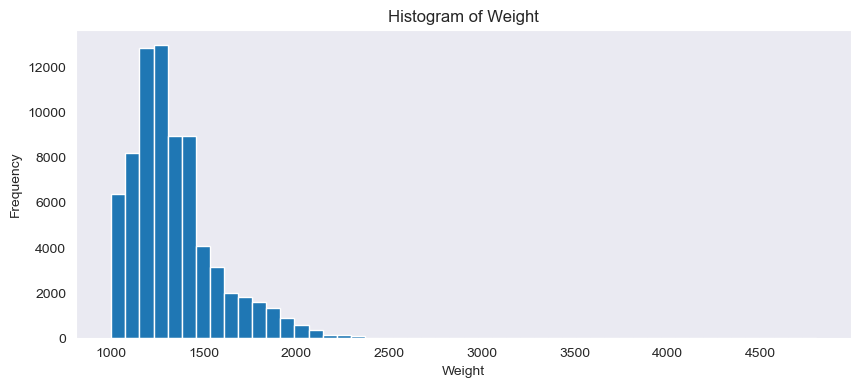

In [16]:
columns_to_plot = ['Premium', 'Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Length', 'Weight']

# Plot histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 4))
    data[column].hist(bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

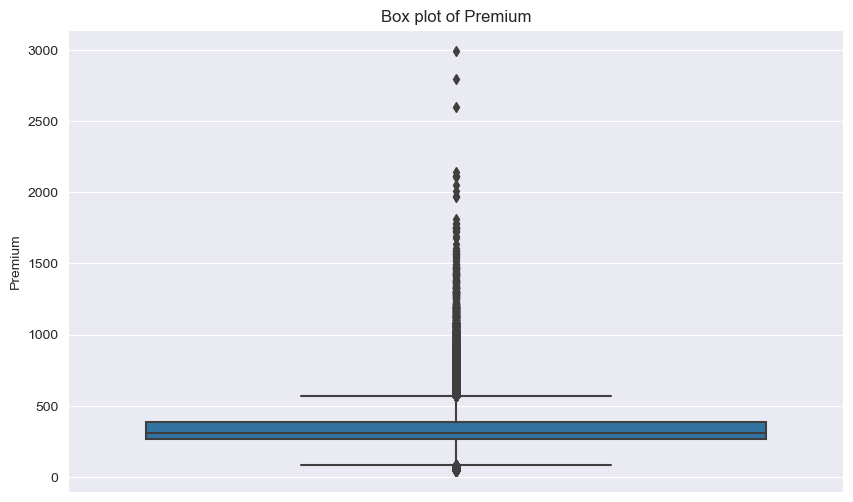

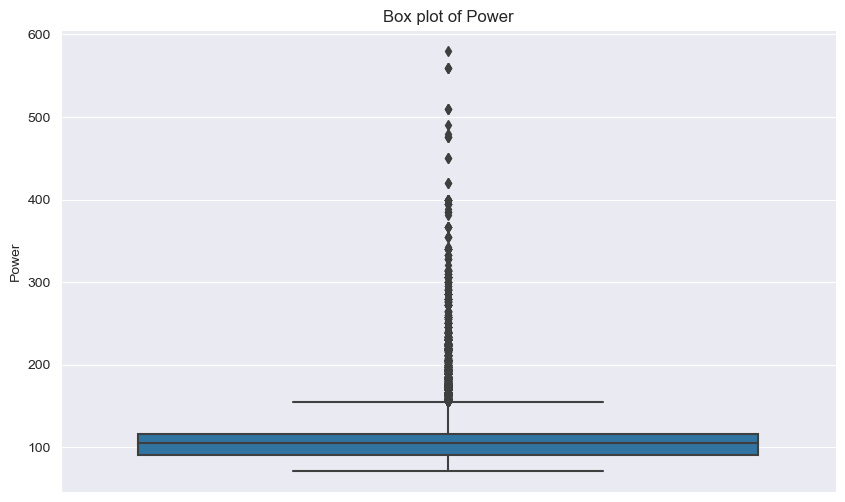

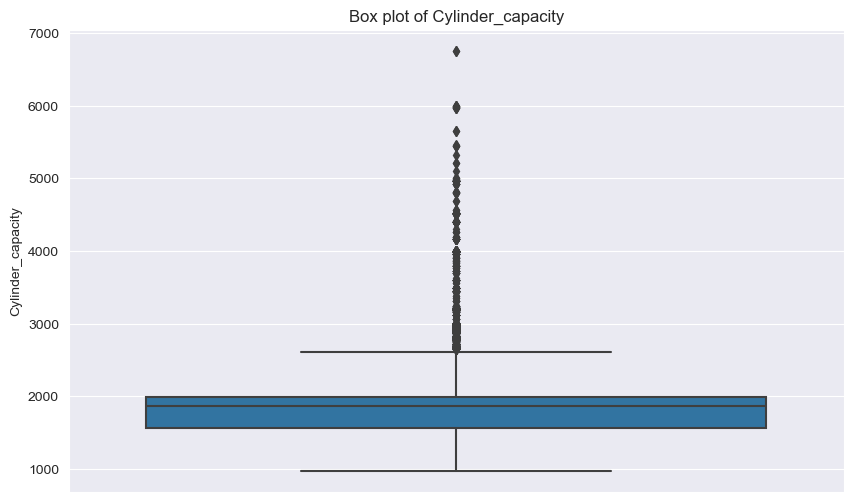

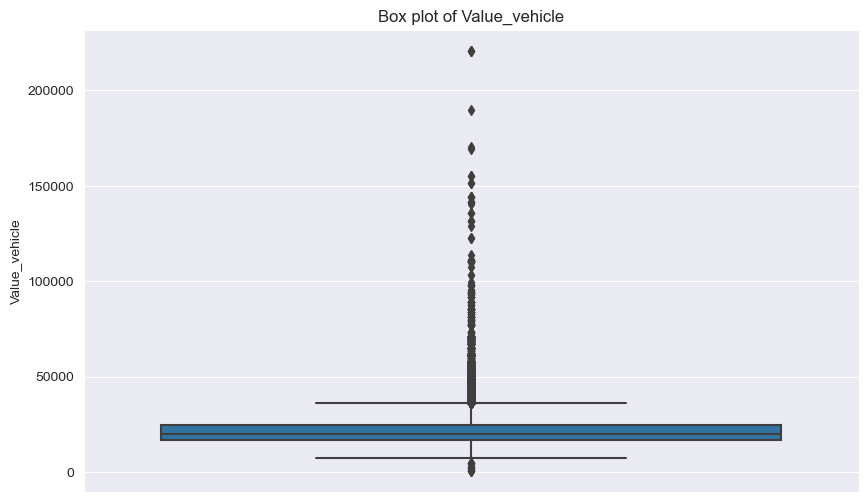

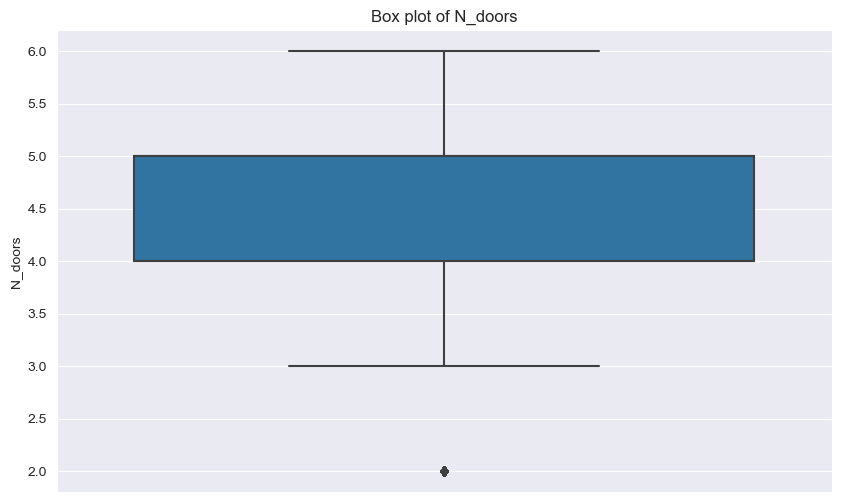

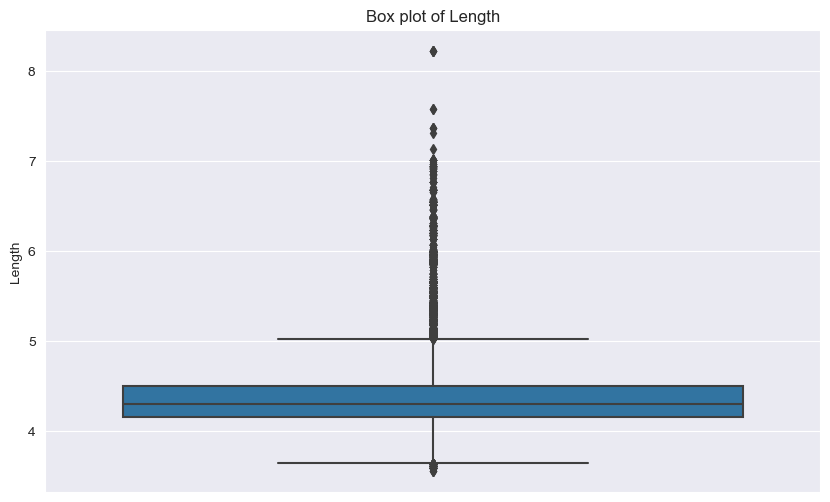

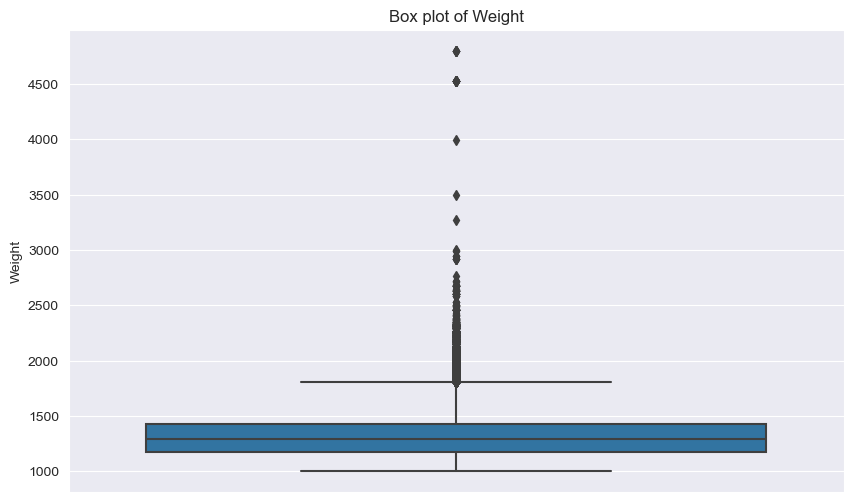

In [17]:
columns_to_plot = [
    'Premium','Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Length', 'Weight'
]

# Create a box plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [18]:
data[columns_to_plot].describe()

,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight
count,74763.000000,74763.000000,74763.000000,74763.000000,74763.000000,74763.000000,74763.000000
mean,345.228926,107.869240,1807.280098,21495.984312,4.489119,4.355287,1340.524711
std,140.208723,27.754554,391.693380,8021.882476,0.856087,0.355317,241.469724
min,40.400000,71.000000,973.000000,450.760000,2.000000,3.551000,1003.000000
25%,262.940000,90.000000,1560.000000,16550.000000,4.000000,4.152000,1179.000000
50%,311.040000,105.000000,1868.000000,20075.000000,5.000000,4.300000,1290.000000
75%,383.815000,116.000000,1995.000000,24349.000000,5.000000,4.498000,1430.000000
max,2993.340000,580.000000,6753.000000,220675.800000,6.000000,8.218000,4800.000000


In [19]:
# Detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


def plot_data_with_outliers(data, outliers, title, xlabel, ylabel):
    """
    Plots data points and highlights outliers.

    Parameters:
    - data: DataFrame containing the original data.
    - outliers: DataFrame containing the outliers.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data, 'bo', label='Data Points')  # Plot original data points
    plt.plot(outliers.index, outliers, 'ro', label='Outliers')  # Highlight outliers
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()



def save_outliers(dataframe, field_name):
    directory_path = '../data/outliers'
    
    origin = os.getcwd()

    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

    file_path = os.path.join(origin, directory_path, f'{field_name}_outliers.csv')

    try:
        dataframe.to_csv(file_path, index=False)
        print(f'File saved successfully at {file_path}')
    except Exception as e:
        print('An error occurred:', e)

### Premium

In [20]:
premium_outliers = detect_outliers(data, 'Premium')
premium_outliers

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
69,29,1964-08-18,1984-07-31,571.49,110,1686,21465.00,5,D,4.419,1428
97,43,1963-05-02,1981-10-10,689.93,150,1997,47527.49,5,D,5.309,2070
113,51,1971-02-19,1990-12-01,775.81,82,1199,13910.00,5,P,3.962,1035
206,104,1975-10-03,2005-10-26,613.77,140,1997,29700.00,5,D,4.443,1539
207,104,1975-10-03,2005-10-26,632.19,140,1997,29700.00,5,D,4.443,1539
...,...,...,...,...,...,...,...,...,...,...,...
105497,53451,1992-06-17,2013-08-03,768.21,110,1199,18110.00,5,P,3.941,1070
105501,53455,1991-07-18,2009-11-11,611.79,82,1199,18300.00,5,P,4.157,1040
105514,53465,1977-01-16,2005-01-27,752.45,140,1968,27830.00,4,D,4.644,1366
105515,53465,1977-01-16,2005-01-27,756.22,140,1968,27830.00,4,D,4.644,1366


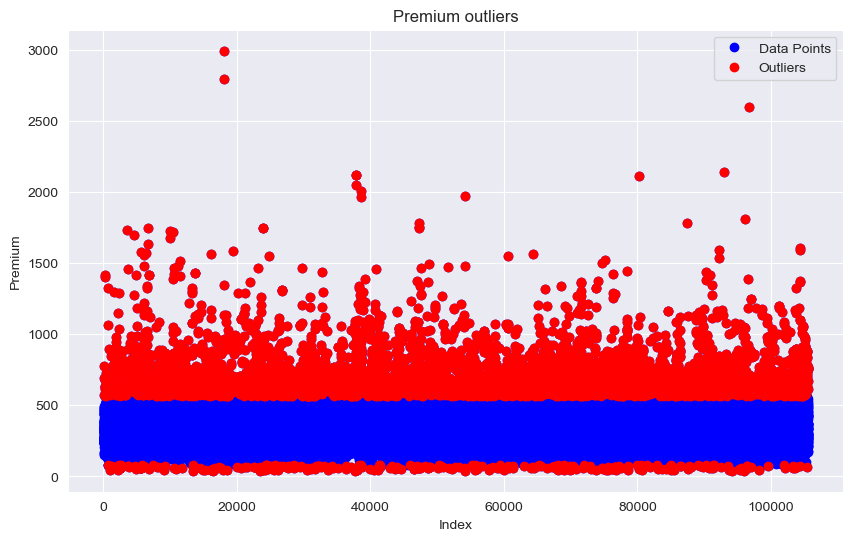

In [21]:
# Plot original Premium data points
plot_data_with_outliers(data['Premium'], premium_outliers['Premium'], 'Premium outliers', 'Index', 'Premium')

In [22]:
# Calculate Q1 and Q3
Q1 = data['Premium'].quantile(0.25)
Q3 = data['Premium'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Filter the dataset for outliers on the lower end
lower_end_outliers = premium_outliers[premium_outliers['Premium'] < lower_bound]

# Display the outliers
lower_end_outliers


,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
733,374,1942-12-27,1970-04-29,80.02,129,4525,42920.00,3,D,4.355,4525
947,477,1954-07-21,1972-09-04,41.98,110,1968,16500.00,5,D,4.408,1457
969,487,1959-01-07,1983-07-15,73.64,84,1587,17640.00,5,P,4.211,1187
1235,617,1960-12-11,1996-06-03,72.09,105,1896,20500.00,5,D,4.469,1430
1612,804,1971-05-26,1990-07-27,68.22,90,1360,17020.00,5,P,4.260,1182
2152,1088,1956-12-07,1975-07-26,45.93,100,1998,23410.00,5,D,5.201,1725
2349,1191,1962-09-28,1992-03-10,81.04,130,2179,38710.00,5,D,4.727,1708
2420,1229,1952-06-09,1978-06-09,62.26,150,2496,7362.40,4,P,4.900,1440
2421,1229,1952-06-09,1978-06-09,59.90,150,2496,7362.40,4,P,4.900,1440
2422,1229,1952-06-09,1978-06-09,61.40,150,2496,7362.40,4,P,4.900,1440


I will consider drivers with a Date_birth younger than 1970 an outlier

In [23]:
premium_outliers = lower_end_outliers[lower_end_outliers['Premium'] <= 150]
premium_outliers

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
733,374,1942-12-27,1970-04-29,80.02,129,4525,42920.00,3,D,4.355,4525
947,477,1954-07-21,1972-09-04,41.98,110,1968,16500.00,5,D,4.408,1457
969,487,1959-01-07,1983-07-15,73.64,84,1587,17640.00,5,P,4.211,1187
1235,617,1960-12-11,1996-06-03,72.09,105,1896,20500.00,5,D,4.469,1430
1612,804,1971-05-26,1990-07-27,68.22,90,1360,17020.00,5,P,4.260,1182
2152,1088,1956-12-07,1975-07-26,45.93,100,1998,23410.00,5,D,5.201,1725
2349,1191,1962-09-28,1992-03-10,81.04,130,2179,38710.00,5,D,4.727,1708
2420,1229,1952-06-09,1978-06-09,62.26,150,2496,7362.40,4,P,4.900,1440
2421,1229,1952-06-09,1978-06-09,59.90,150,2496,7362.40,4,P,4.900,1440
2422,1229,1952-06-09,1978-06-09,61.40,150,2496,7362.40,4,P,4.900,1440


save the outliers to a csv file

In [24]:
save_outliers(premium_outliers, 'premium')

File saved successfully at /Users/sharlmagnehenry/DataspellProjects/motor-vehicle-insurance-data-analysis/notebooks/../data/outliers/premium_outliers.csv


### Power

In [25]:
power_outliers = detect_outliers(data, 'Power')
power_outliers['Power']

119       160
120       160
228       224
229       224
291       184
         ... 
105492    163
105509    185
105510    185
105526    170
105536    224
Name: Power, Length: 3008, dtype: int64

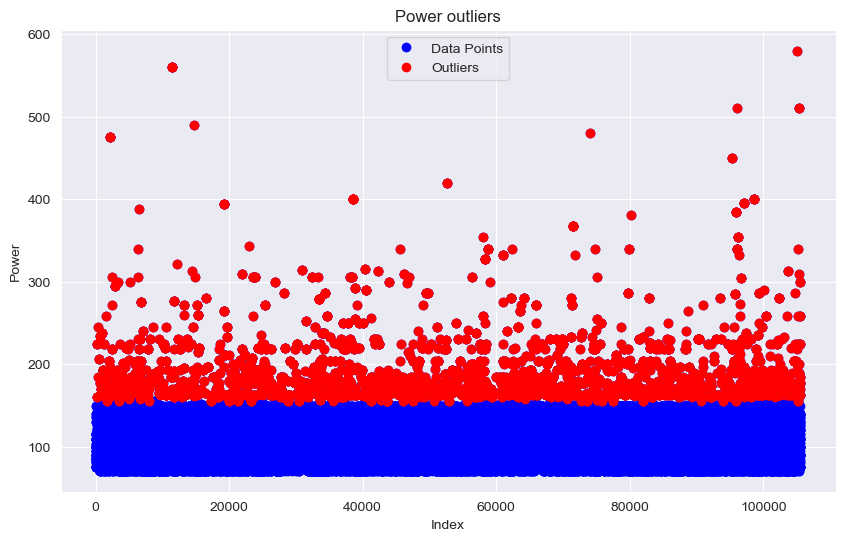

In [26]:
# Plot original Premium data points
plot_data_with_outliers(data['Power'], power_outliers['Power'], 'Power outliers', 'Index', 'Power')

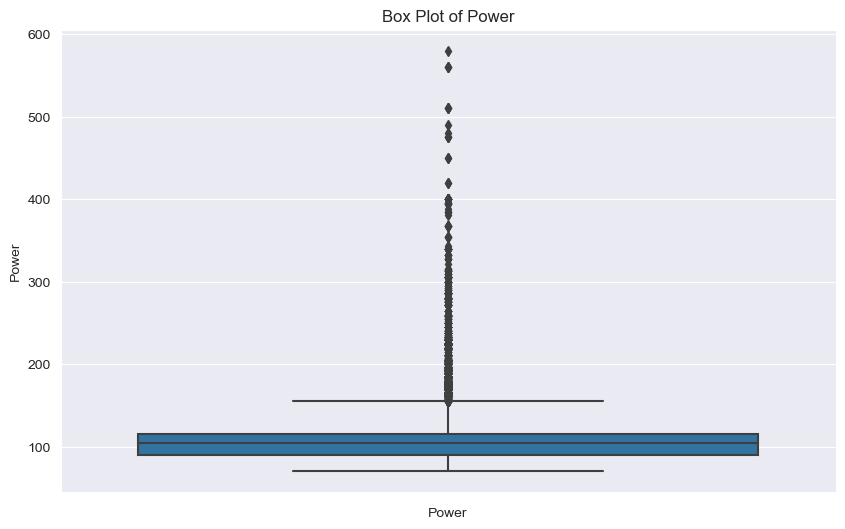

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Power'])
plt.title('Box Plot of Power')
plt.xlabel('Power')
plt.show()

No outliers detected

### Cylinder_capacity

In [28]:
cylinder_capacity_outliers = detect_outliers(data, 'Cylinder_capacity')
cylinder_capacity_outliers['Cylinder_capacity']

52        2820
53        2820
54        2820
60        2799
98        3996
          ... 
105460    2993
105461    2993
105479    2688
105526    2685
105536    2987
Name: Cylinder_capacity, Length: 2945, dtype: int64

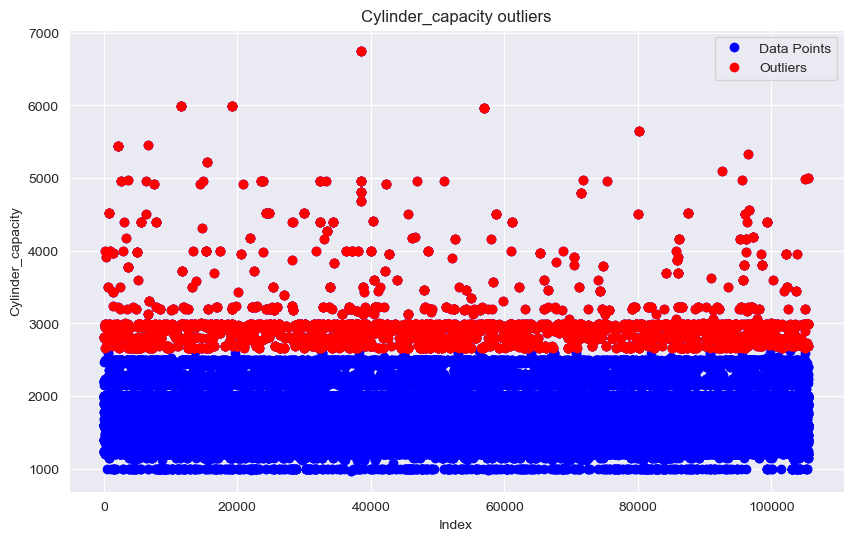

In [29]:
# Plot original Premium data points
plot_data_with_outliers(data['Cylinder_capacity'], cylinder_capacity_outliers['Cylinder_capacity'], 'Cylinder_capacity outliers', 'Index', 'Cylinder_capacity')



No outliers detected

### Value_vehicle

In [30]:
value_vehicle_outliers = detect_outliers(data, 'Value_vehicle')
value_vehicle_outliers[['Value_vehicle', 'Cylinder_capacity', 'Power']]


,Value_vehicle,Cylinder_capacity,Power
97,47527.49,1997,150
98,69000.00,3996,150
106,40220.00,2499,95
228,60800.00,2987,224
229,60800.00,2987,224
...,...,...,...
105492,41570.00,2401,163
105509,48735.00,2401,185
105510,48735.00,2401,185
105526,40823.11,2685,170


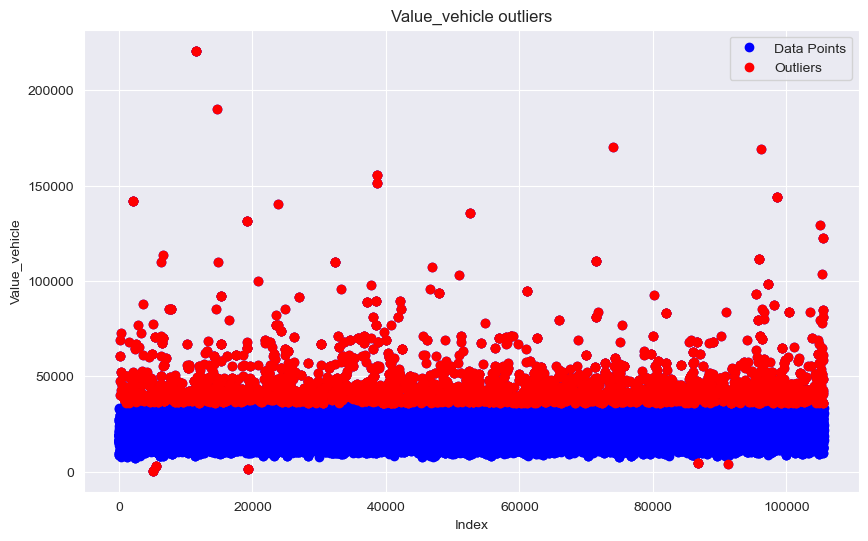

In [31]:
# Plot original Premium data points
plot_data_with_outliers(data['Value_vehicle'], value_vehicle_outliers['Value_vehicle'], 'Value_vehicle outliers', 'Index', 'Value_vehicle')


In [32]:
# Calculate Q1 and Q3
Q1 = data['Value_vehicle'].quantile(0.25)
Q3 = data['Value_vehicle'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Filter the dataset for outliers on the lower end of the value_vehicle column
lower_end_outliers = value_vehicle_outliers[value_vehicle_outliers['Value_vehicle'] < lower_bound]

# Display the outliers
lower_end_outliers

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
5090,2511,1967-11-27,1986-07-10,262.55,105,1395,450.76,3,P,4.240,1350
5091,2511,1967-11-27,1986-07-10,270.43,105,1395,450.76,3,P,4.240,1350
5092,2511,1967-11-27,1986-07-10,271.80,105,1395,450.76,3,P,4.240,1350
5590,2754,1972-01-10,1990-11-30,56.48,95,1598,2734.61,4,P,4.264,1015
5591,2754,1972-01-10,1990-11-30,59.01,95,1598,2734.61,4,P,4.264,1015
5592,2754,1972-01-10,1990-11-30,60.78,95,1598,2734.61,4,P,4.264,1015
19366,9578,1941-02-22,1967-12-15,89.99,118,1758,1502.53,2,P,4.042,1020
19367,9578,1941-02-22,1967-12-15,94.04,118,1758,1502.53,2,P,4.042,1020
19368,9578,1941-02-22,1967-12-15,94.04,118,1758,1502.53,2,P,4.042,1020
86783,43437,1951-07-24,1969-08-20,327.36,80,1588,4417.44,5,D,4.570,1380


In [33]:
save_outliers(lower_end_outliers, 'value_vehicle')

File saved successfully at /Users/sharlmagnehenry/DataspellProjects/motor-vehicle-insurance-data-analysis/notebooks/../data/outliers/value_vehicle_outliers.csv


### Length

In [34]:
length_outliers = detect_outliers(data, 'Length')
length_outliers[['Length', 'Weight', 'Power', 'Type_fuel', 'Cylinder_capacity']]

,Length,Weight,Power,Type_fuel,Cylinder_capacity
60,5.584,2223,115,D,2799
64,5.223,1795,109,D,2148
97,5.309,2070,150,D,1997
106,5.096,1892,95,P,2499
138,5.993,2015,109,D,2982
...,...,...,...,...,...
105164,3.606,1030,82,P,1397
105165,3.606,1030,82,P,1397
105337,5.290,1687,102,D,1896
105406,5.099,1960,100,D,2179


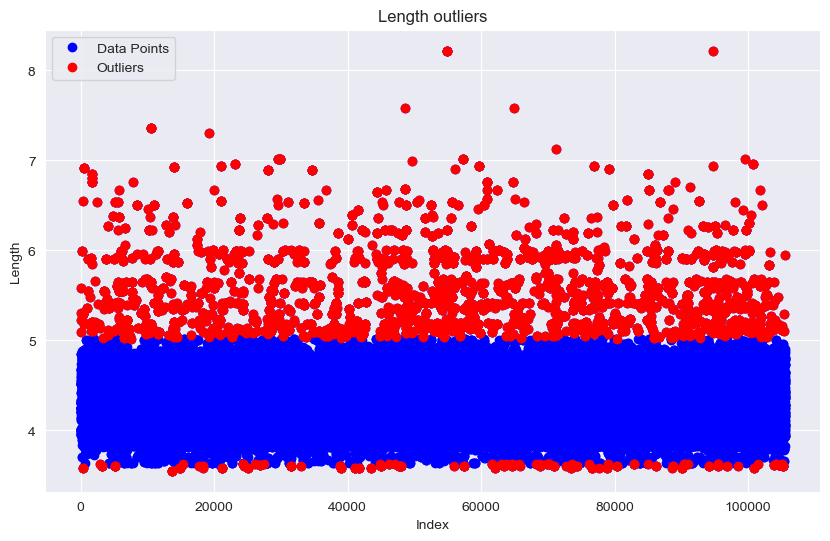

In [35]:
plot_data_with_outliers(data['Length'], length_outliers['Length'], 'Length outliers', 'Index', 'Length')

No outliers detected

### Weight


In [36]:
weight_outliers = detect_outliers(data, 'Weight')
weight_outliers[['Weight', 'Length', 'Power', 'Cylinder_capacity']]

,Weight,Length,Power,Cylinder_capacity
52,1995,4.845,115,2820
53,1995,4.845,115,2820
54,1995,4.845,115,2820
60,2223,5.584,115,2799
97,2070,5.309,150,1997
...,...,...,...,...
105479,2175,4.635,163,2688
105492,1982,4.798,163,2401
105509,2058,4.807,185,2401
105510,2058,4.807,185,2401


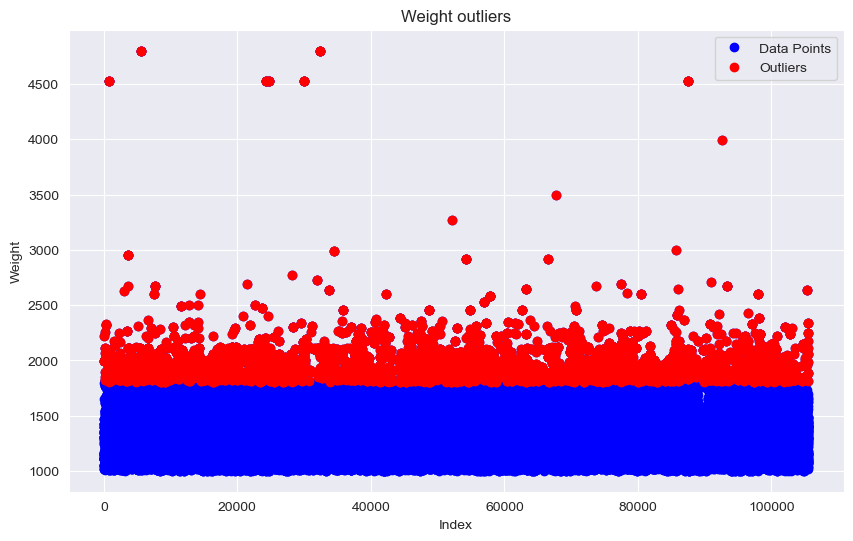

In [37]:
plot_data_with_outliers(data['Weight'], weight_outliers['Weight'], 'Weight outliers', 'Index', 'Weight')

In [38]:
# Calculate Q1 and Q3
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset for outliers on the upper end of the Weight column
upper_end_outliers = weight_outliers[weight_outliers['Weight'] > upper_bound]

# Display the outliers
upper_end_outliers



,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
52,21,1943-05-04,1973-12-18,250.46,115,2820,19340.57,5,D,4.845,1995
53,21,1943-05-04,1973-12-18,259.22,115,2820,19340.57,5,D,4.845,1995
54,21,1943-05-04,1973-12-18,260.51,115,2820,19340.57,5,D,4.845,1995
60,24,1960-05-31,1982-10-14,328.02,115,2799,24063.94,2,D,5.584,2223
97,43,1963-05-02,1981-10-10,689.93,150,1997,47527.49,5,D,5.309,2070
...,...,...,...,...,...,...,...,...,...,...,...
105479,53438,1976-06-03,2014-04-22,542.44,163,2688,42800.00,5,D,4.635,2175
105492,53448,1968-04-18,2014-03-27,505.99,163,2401,41570.00,5,D,4.798,1982
105509,53461,1947-09-29,1974-01-04,329.55,185,2401,48735.00,5,D,4.807,2058
105510,53461,1947-09-29,1974-01-04,332.86,185,2401,48735.00,5,D,4.807,2058


No outliers detected

In [39]:
# Load all the outliers into a single dataframe

premium_outliers = pd.read_csv('../data/outliers/premium_outliers.csv')
value_vehicle_outliers = pd.read_csv('../data/outliers/value_vehicle_outliers.csv')

# Show the outliers without duplicates
all_outliers = pd.concat([premium_outliers, value_vehicle_outliers]).drop_duplicates()

all_outliers

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,374,1942-12-27,1970-04-29,80.02,129,4525,42920.00,3,D,4.355,4525
1,477,1954-07-21,1972-09-04,41.98,110,1968,16500.00,5,D,4.408,1457
2,487,1959-01-07,1983-07-15,73.64,84,1587,17640.00,5,P,4.211,1187
3,617,1960-12-11,1996-06-03,72.09,105,1896,20500.00,5,D,4.469,1430
4,804,1971-05-26,1990-07-27,68.22,90,1360,17020.00,5,P,4.260,1182
5,1088,1956-12-07,1975-07-26,45.93,100,1998,23410.00,5,D,5.201,1725
6,1191,1962-09-28,1992-03-10,81.04,130,2179,38710.00,5,D,4.727,1708
7,1229,1952-06-09,1978-06-09,62.26,150,2496,7362.40,4,P,4.900,1440
8,1229,1952-06-09,1978-06-09,59.90,150,2496,7362.40,4,P,4.900,1440
9,1229,1952-06-09,1978-06-09,61.40,150,2496,7362.40,4,P,4.900,1440


In [40]:
# Remove the outliers from the dataset based on the ID column

data_outliers_removed = data[~data['ID'].isin(all_outliers['ID'])]
data_outliers_removed

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
6,3,1975-03-18,1995-07-10,380.20,85,1229,16030.00,5,P,3.999,1105
7,3,1975-03-18,1995-07-10,393.50,85,1229,16030.00,5,P,3.999,1105
8,3,1975-03-18,1995-07-10,393.50,85,1229,16030.00,5,P,3.999,1105
9,3,1975-03-18,1995-07-10,395.47,85,1229,16030.00,5,P,3.999,1105
15,6,1966-10-21,1990-09-10,250.52,87,1598,9927.00,4,P,4.250,1055
...,...,...,...,...,...,...,...,...,...,...,...
105549,53497,1961-06-29,1990-12-28,233.22,75,1968,21761.85,5,D,4.408,1564
105550,53498,1981-07-25,2007-02-14,263.79,110,1997,24320.00,5,D,4.740,1480
105551,53499,1976-12-08,2017-11-29,418.97,129,1998,30861.97,5,P,4.650,1440
105553,53501,1946-09-15,1982-02-02,339.66,90,1753,16610.00,5,D,4.555,1399


In [41]:
# Check for duplicates in the dataset 
duplicates = data_outliers_removed[data_outliers_removed.duplicated()]

# Remove duplicates from the dataset
data_duplicates_removed = data_outliers_removed.drop_duplicates()

# remove the duplicate based on the ID column
data_final = data_outliers_removed.drop_duplicates(subset='ID')

data_final

,ID,Date_birth,Date_driving_licence,Premium,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
6,3,1975-03-18,1995-07-10,380.20,85,1229,16030.00,5,P,3.999,1105
15,6,1966-10-21,1990-09-10,250.52,87,1598,9927.00,4,P,4.250,1055
18,7,1946-05-14,2000-03-24,340.43,109,1396,16550.00,5,P,4.245,1168
19,8,1941-05-11,1962-08-01,335.82,130,1984,27330.00,4,P,4.547,1310
31,13,1951-02-16,1976-10-16,248.68,75,1390,8548.00,4,P,4.250,1050
...,...,...,...,...,...,...,...,...,...,...,...
105549,53497,1961-06-29,1990-12-28,233.22,75,1968,21761.85,5,D,4.408,1564
105550,53498,1981-07-25,2007-02-14,263.79,110,1997,24320.00,5,D,4.740,1480
105551,53499,1976-12-08,2017-11-29,418.97,129,1998,30861.97,5,P,4.650,1440
105553,53501,1946-09-15,1982-02-02,339.66,90,1753,16610.00,5,D,4.555,1399


In [43]:
# Save the cleaned dataset to a new CSV file
path = os.getcwd()

if not os.path.exists('../data/cleaned'):
    os.makedirs('../data/cleaned')

file_name = 'cleaned_motor_vehicle_insurance_data.csv'

absolute_path = os.path.join(path, '../data/cleaned', file_name)

print(absolute_path)

try:
    data_final.to_csv(absolute_path, index=False)
    print('File saved successfully')
except Exception as e:
    print('An error occurred:', e)

/Users/sharlmagnehenry/DataspellProjects/motor-vehicle-insurance-data-analysis/notebooks/../data/cleaned/cleaned_motor_vehicle_insurance_data.csv
File saved successfully
